In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

from models.unet import Unet


import matplotlib.pyplot as plt
import numpy as np

## Set up

In [3]:
class CFG:
    # dataset
    batch_size = 4
    
    # noise
    B_0 = 1e-4
    B_T = 2e-2
    T = 10
    schedule_type = 'cosine'
    s = 0.008

## Dataset

In [16]:
from torch.utils.data import DataLoader
from data.dataset import CIFAR10_Dataset

batch_size = CFG.batch_size
train = CIFAR10_Dataset()
train_loader = DataLoader(train, shuffle=True, batch_size=batch_size)

Files already downloaded and verified


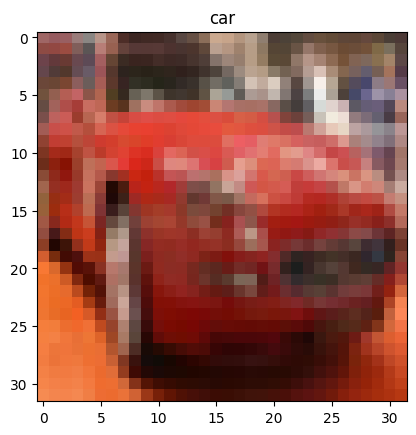

In [17]:
from utils.utils import show_image

image, label = train[5]
show_image(image, train.classes[label])

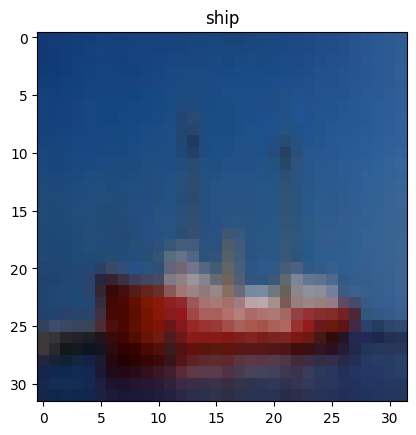

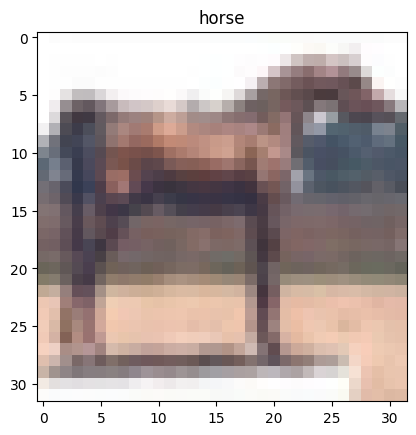

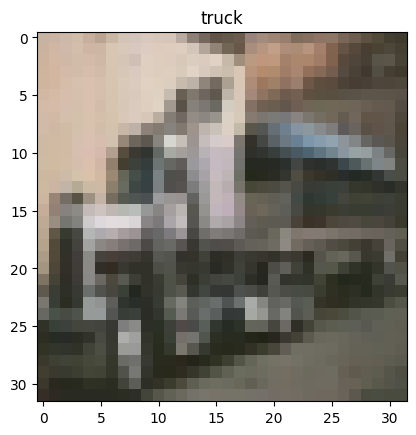

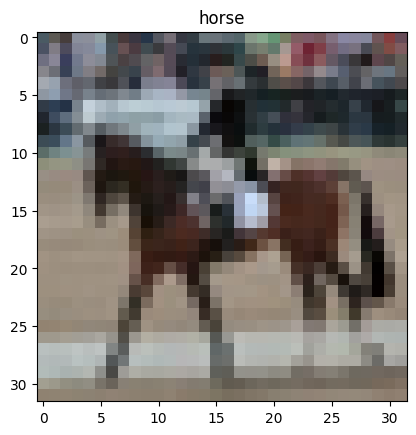

In [18]:
images, labels = next(iter(train_loader))
for image, label in zip(images, labels):
    show_image(image, train.classes[label])

## Noise

In [7]:
def add_noise(img:torch.Tensor, B_t):
    noise = torch.randn_like(img)
    x_t =  torch.sqrt(1 - B_t) * img + torch.sqrt(B_t) * noise
    return x_t

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


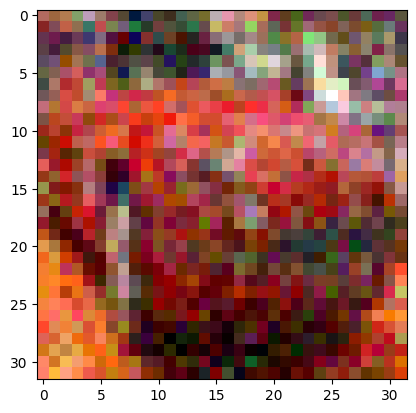

In [8]:
image, label = train[5]
# print(image)

B_t = torch.tensor(2e-2)
noise_image = add_noise(image, B_t)
noise_image = add_noise(noise_image, B_t)
show_image(noise_image)

### Schedule

In [9]:
from utils.noise import NoiseSchedule

tensor(0.0002, dtype=torch.float64)
tensor(0.0012, dtype=torch.float64)


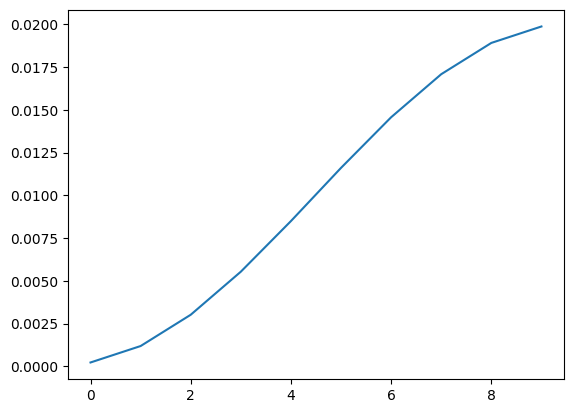

In [ ]:
Schedule = NoiseSchedule(CFG.T, CFG.schedule_type, CFG.B_0, CFG.B_T)
Schedule = NoiseSchedule(CFG.T, 'linear', CFG.B_0, CFG.B_T)
Schedule = NoiseSchedule(CFG.T, 'cosine', CFG.B_0, CFG.B_T)
print(Schedule[0])

var = next(Schedule)
print(var)

Schedule.plot_schedule()

### Cosine Noise adder

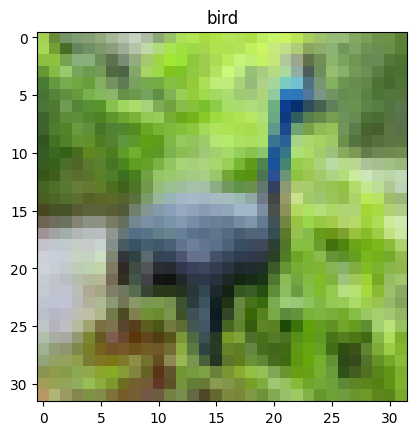

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


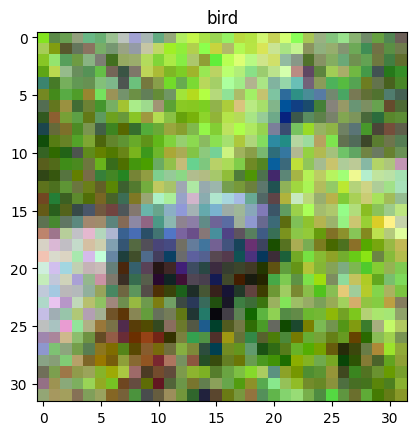

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


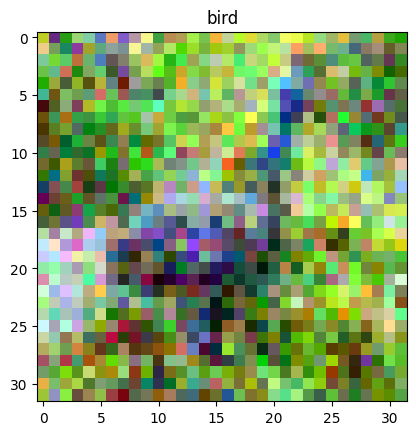

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


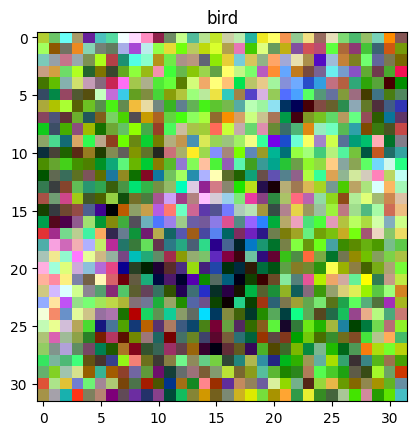

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


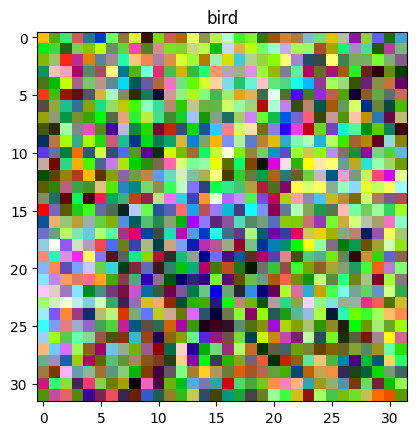

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


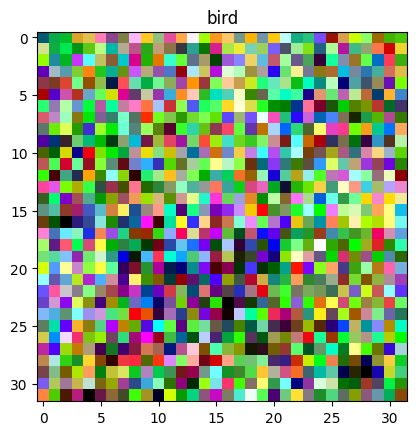

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


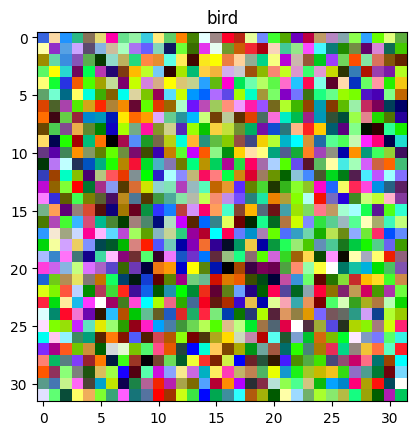

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


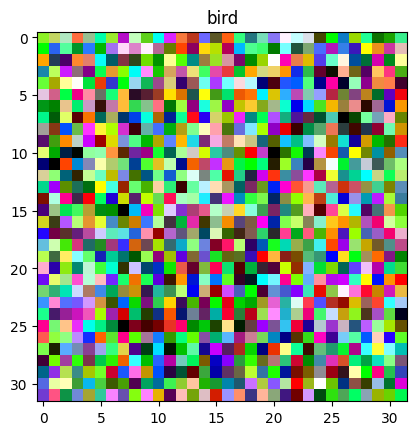

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


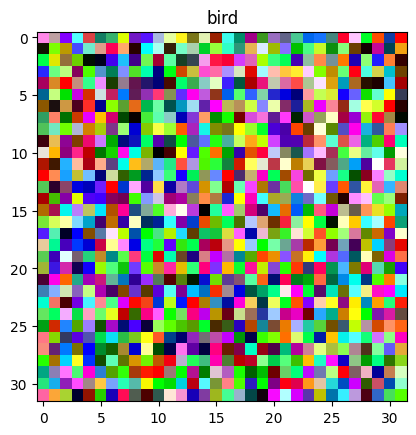

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


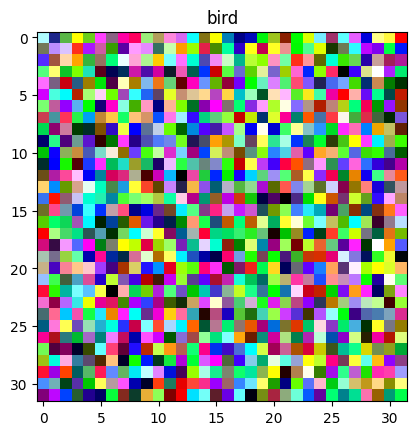

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


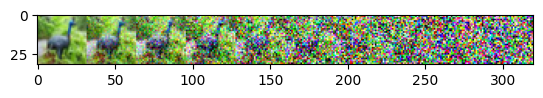

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


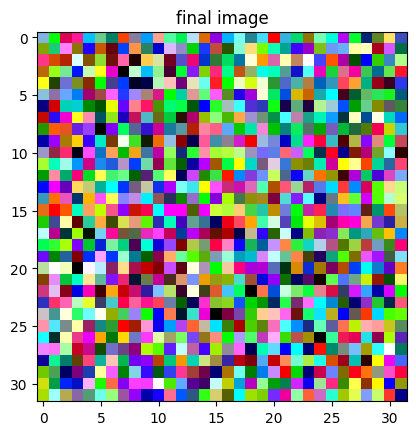

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


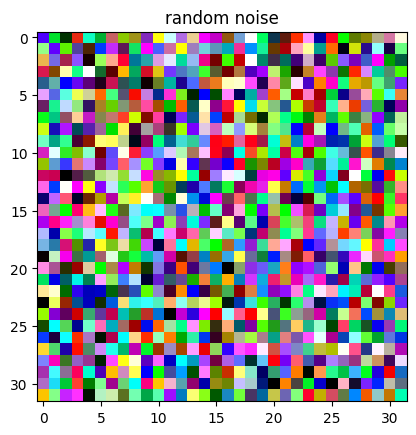

In [20]:
from utils.noise import CosineNoiseAdder

noise_adder = CosineNoiseAdder(CFG.T, CFG.s)

# Example input image
img, label = train[6]
full_img = torch.tensor([])

# Visualize the noise addition process
for t in range(0, CFG.T, 1):
    noisy_img, noise = noise_adder.image_at_time_step(img, t)
    full_img = torch.cat((full_img, noisy_img), 2)
    show_image(noisy_img, train.classes[label])
show_image(full_img)

final_noisy_img, noise = noise_adder.image_at_time_step(img, CFG.T - 1)
show_image(final_noisy_img, title="final image")

final_noise = torch.randn_like(img)
show_image(final_noise, title="random noise")

## Model

In [14]:
# train = CIFAR10_Dataset()
# train_loader = DataLoader(train, shuffle=True, batch_size=16)
# batch = next(iter(train_loader))
# print(batch[0].shape)
# # img, label = train[6]
# imgs = batch[0]

# fake data for testing
imgs = torch.randn(16, 3, 128, 128)

In [15]:
net = Unet()
print("\n", net(imgs).shape)

down block 0, with shape torch.Size([16, 3, 128, 128])
down block 1, with shape torch.Size([16, 16, 64, 64])
down block 2, with shape torch.Size([16, 32, 32, 32])
after bottleneck : shape = torch.Size([16, 64, 32, 32])
up block 0, with shape torch.Size([16, 64, 32, 32])
up block 1, with shape torch.Size([16, 32, 64, 64])
after final : shape = torch.Size([16, 3, 128, 128])

 torch.Size([16, 3, 128, 128])
